# Drugs A, B, C, X, Y for Decision Trees

### About Dataset:
##### Imagine that you are a medical researcher compiling data for a study. 
##### You have collected data about a set of patients, all of whom suffered from the same illness.
##### During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

### Task:
##### To build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

##### It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

## Import Libraries

In [95]:
import pandas as pd                 # Data manipulation
import matplotlib.pyplot as plt     # Data visualization
import seaborn as sns               # Enhanced data visualization # Set matplotlib backend to display plots inline within Jupyter Notebook
%matplotlib inline                  


from sklearn import datasets         # sklearn library - Use for classification, regression, clustering, dimensionality reduction etc.
import numpy as np                   # Numerical computing and array operations

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split         # Splitting the data into train and test

from sklearn.tree import DecisionTreeClassifier, plot_tree   # DecisionTreeClassifier tasks & plot_tree_visualizing decision trees

from sklearn import tree                                     # decision tree-based models

from sklearn.metrics import classification_report, confusion_matrix    # evaluating classification model performance


from sklearn import preprocessing                                      # data preprocessing tasks
from sklearn.preprocessing import LabelEncoder                         # encoding categorical variables into numerical

## Import Dataset

In [96]:
drugs = pd.read_csv("drug200.csv", index_col=0)  # 'Index_col=0' set the first column as the index

### EDA: Clean and analyze Data

In [97]:
drugs.head()    # Display the first few rows to understand the dataset

,Sex,BP,Cholesterol,Na_to_K,Drug
Age,,,,,
23,F,HIGH,HIGH,25.355,drugY
47,M,LOW,HIGH,13.093,drugC
47,M,LOW,HIGH,10.114,drugC
28,F,NORMAL,HIGH,7.798,drugX
61,F,LOW,HIGH,18.043,drugY


In [98]:
drugs.tail()

,Sex,BP,Cholesterol,Na_to_K,Drug
Age,,,,,
56,F,LOW,HIGH,11.567,drugC
16,M,LOW,HIGH,12.006,drugC
52,M,NORMAL,HIGH,9.894,drugX
23,M,NORMAL,NORMAL,14.020,drugX
40,F,LOW,NORMAL,11.349,drugX


In [99]:
drugs.columns

Index(['Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [100]:
drugs.dtypes

Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [101]:
drugs.shape          # Retrieve the dimensions (number of rows and columns)

(200, 5)

In [102]:
drugs.info()         # Display concise information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 23 to 40
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          200 non-null    object 
 1   BP           200 non-null    object 
 2   Cholesterol  200 non-null    object 
 3   Na_to_K      200 non-null    float64
 4   Drug         200 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.4+ KB


### Cleaning the Dataset

In [103]:
drugs[drugs.duplicated()].shape         #Check for duplicated rows in the DataFrame

(0, 5)

In [104]:
drugs_cleaned = drugs.drop_duplicates()  #New DataFrame 'drugs_cleaned' by removing duplicated rows from the 'drugs' DataFrame


In [105]:
drugs_cleaned.shape                      #Retrieve the dimensions of the new DataFrame

(200, 5)

In [106]:
missing_values = drugs.isnull().sum()    #Calculate the sum of missing values for each column in the DF
print(missing_values)

Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


### Analyzing the Dataset

In [107]:
drugs.describe()    #Descriptive Statistics:to understand numerical features.

,Na_to_K
count,200.000000
mean,16.084485
std,7.223956
min,6.269000
25%,10.445500
50%,13.936500
75%,19.380000
max,38.247000


#### Visualizations:

#### Partitioning into Training and Testing Sets

In [108]:
drugs.head()

,Sex,BP,Cholesterol,Na_to_K,Drug
Age,,,,,
23,F,HIGH,HIGH,25.355,drugY
47,M,LOW,HIGH,13.093,drugC
47,M,LOW,HIGH,10.114,drugC
28,F,NORMAL,HIGH,7.798,drugX
61,F,LOW,HIGH,18.043,drugY


In [109]:
x = drugs[['Sex', 'BP', 'Cholesterol', 'Na_to_K']]  # Features variable
y = drugs['Drug']  # Target variable

In [110]:
#convert object data columns into numerical data columns

drugs['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [111]:
#Handling Categorical Feature Sex,BP and Cholesterol
#map() will apply the given condition

#drugs['Sex']=drugs['Sex'].map({'M':0,'F':1})

#drugs['BP']=drugs['BP'].map({'HIGH':0,'LOW':1,'NORMAL':2})

#drugs['Cholesterol']=drugs['Cholesterol'].map({'HIGH':0,'NORMAL':2})
#drugs.head()

In [112]:
#drugs['Cholesterol'].value_counts()

#### Use label encoder to convert Object columns Sex, BP, Cholesterol (feature variables) and Drug (target variable) into Numbers.

In [113]:
label_encoder = preprocessing.LabelEncoder()
drugs['Sex'] = label_encoder.fit_transform(drugs['Sex'])
drugs['BP'] = label_encoder.fit_transform(drugs['BP'])
drugs['Cholesterol'] = label_encoder.fit_transform(drugs['Cholesterol'])
drugs['Drug'] = label_encoder.fit_transform(drugs['Drug'])

In [114]:
drugs['Sex'].value_counts()    # Count the occurrences of each unique value in the column

1    104
0     96
Name: Sex, dtype: int64

In [115]:
drugs['BP'].value_counts()

0    77
1    64
2    59
Name: BP, dtype: int64

In [116]:
drugs['Cholesterol'].value_counts()

0    103
1     97
Name: Cholesterol, dtype: int64

In [117]:
drugs.head()

,Sex,BP,Cholesterol,Na_to_K,Drug
Age,,,,,
23,0,0,0,25.355,4
47,1,1,0,13.093,2
47,1,1,0,10.114,2
28,0,2,0,7.798,3
61,0,1,0,18.043,4


#### Split the dataset into features and target variable

In [118]:
#drugs.iloc[:,0:5]   # Selects all rows and the first five columns

In [119]:
#x = drugs.iloc[:,0:4]
#y = drugs.iloc[:,4]

In [120]:
# Splitting the 'drugs' DataFrame into features (x) and target variable (y)

x = drugs.drop('Drug', axis=1)   # Selects columns 0 to 3 as features (independent variables)
y = drugs['Drug']                # Selects column 4 as the target variable (dependent variable)

In [121]:
x

,Sex,BP,Cholesterol,Na_to_K
Age,,,,
23,0,0,0,25.355
47,1,1,0,13.093
47,1,1,0,10.114
28,0,2,0,7.798
61,0,1,0,18.043
...,...,...,...,...
56,0,1,0,11.567
16,1,1,0,12.006
52,1,2,0,9.894


In [122]:
y

Age
23    4
47    2
47    2
28    3
61    4
     ..
56    2
16    2
52    3
23    3
40    3
Name: Drug, Length: 200, dtype: int32

In [123]:
# Splitting the dataset into train and test

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape  # Displaying shapes of the training and testing datasets for x and y variables.

((160, 4), (40, 4), (160,), (40,))

In [126]:
x_test    # Variable storing the testing set features (X_test) for evaluation or prediction

,Sex,BP,Cholesterol,Na_to_K
Age,,,,
36,1,1,1,11.424
16,0,0,1,15.516
18,0,2,1,8.750
59,0,1,0,10.444
47,1,1,1,33.542
51,1,0,0,18.295
18,0,0,1,24.276
28,0,2,0,12.879
42,1,0,1,12.766


In [127]:
y_test         #Variable storing the testing set target variables (y_test) for evaluation or comparison

Age
36    3
16    4
18    3
59    2
47    4
51    4
18    4
28    3
42    0
66    3
29    0
20    3
38    4
19    0
70    1
25    4
65    1
55    3
32    2
54    4
53    1
69    3
61    3
42    4
68    4
38    4
47    2
17    3
19    4
49    3
43    4
23    2
26    2
26    4
49    0
22    4
74    3
35    0
16    4
36    0
Name: Drug, dtype: int32

### Building Decision Tree Classifier using Entropy as a Criterion

In [128]:
model = DecisionTreeClassifier(criterion='entropy',max_depth = 3)
#model = DecisionTreeClassifier(random_state=42)    #The random_state=42 parameter sets the random seed, ensuring reproducibility of results.
model.fit(x_train,y_train)             # Train the Decision Tree Classifier model using the training data (features x_train and target y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

#### Plot the DecsionTree

[Text(0.625, 0.875, 'x[3] <= 14.829\nentropy = 1.923\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5, 0.625, 'x[1] <= 0.5\nentropy = 1.762\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.25, 0.375, 'x[3] <= 13.197\nentropy = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.125, 'entropy = 0.918\nsamples = 24\nvalue = [16, 8, 0, 0, 0]'),
 Text(0.375, 0.125, 'entropy = 0.65\nsamples = 6\nvalue = [1, 5, 0, 0, 0]'),
 Text(0.75, 0.375, 'x[1] <= 1.5\nentropy = 0.729\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.625, 0.125, 'entropy = 0.999\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]')]

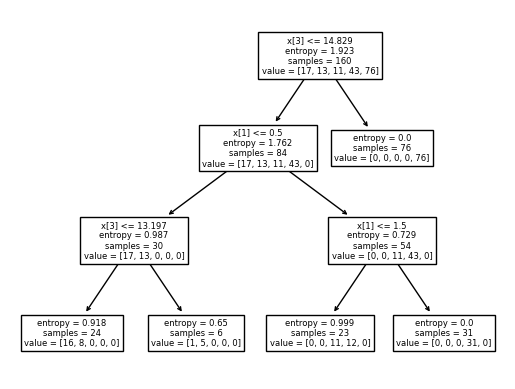

In [129]:
tree.plot_tree(model)          #Visualize the trained Decision Tree Classifier using the plot_tree function

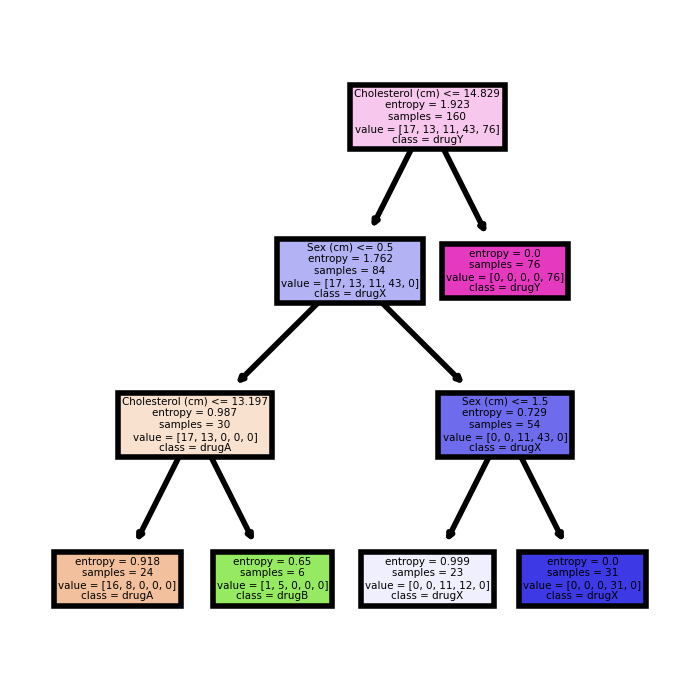

In [130]:
# Define feature names (fn) and class names (cn), create a figure and plot the Decision Tree Classifier
fn = ['Age (cm)', 'Sex (cm)', 'BP (cm)', 'Cholesterol (cm)', 'Na_to_K(cm)']
cn = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
 
# Create a figure and plot the Decision Tree Classifier using the plot_tree function
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=400)      # Set figure size and DPI
tree.plot_tree(model,feature_names=fn,class_names = cn, filled=True)   # Plot the decision tree
plt.show()                                                             # Show the plotted decision tree

#### Prediction on the Test data

In [131]:
preds = model.predict(x_test)     # Generate predictions using the trained Decision Tree Classifier on the test set features (x_test)

In [132]:
pd.Series(preds).value_counts()    # Count the occurrences of each unique predicted value in the 'preds' array

3    16
4    15
0     8
1     1
dtype: int64

In [133]:
preds                            # Variable containing the predictions made by a machine learning model

array([3, 4, 3, 3, 4, 4, 4, 3, 0, 3, 0, 3, 4, 1, 0, 4, 0, 3, 3, 4, 0, 3,
       3, 4, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 0, 4, 3, 0, 4, 0])

In [134]:
y_test                            # Variable containing the true or actual values of the target variable for testing

Age
36    3
16    4
18    3
59    2
47    4
51    4
18    4
28    3
42    0
66    3
29    0
20    3
38    4
19    0
70    1
25    4
65    1
55    3
32    2
54    4
53    1
69    3
61    3
42    4
68    4
38    4
47    2
17    3
19    4
49    3
43    4
23    2
26    2
26    4
49    0
22    4
74    3
35    0
16    4
36    0
Name: Drug, dtype: int32

#### Crosstab : Way to understand the two way table between predicted vs actual values for evaluation

In [135]:
pd.crosstab(y_test,preds)

col_0,0,1,3,4
Drug,,,,
0,5,1,0,0
1,3,0,0,0
2,0,0,5,0
3,0,0,11,0
4,0,0,0,15


#### Accuracy of the above model

In [136]:
# Calculate the mean accuracy by comparing predicted values with actual values
np.mean(preds==y_test)        

0.775

In [137]:
# Assign the predicted values ('preds') as a new column in the 'x_test' DataFrame
x_test['preds']=preds         

In [138]:
# Assign the actual values ('y_test') as a new column in the 'x_test' DataFrame
x_test['y_test']=y_test

In [139]:
x_test        #Variable containing the testing set of features (x_test) for model evaluation or prediction

,Sex,BP,Cholesterol,Na_to_K,preds,y_test
Age,,,,,,
36,1,1,1,11.424,3,3
16,0,0,1,15.516,4,4
18,0,2,1,8.750,3,3
59,0,1,0,10.444,3,2
47,1,1,1,33.542,4,4
51,1,0,0,18.295,4,4
18,0,0,1,24.276,4,4
28,0,2,0,12.879,3,3
42,1,0,1,12.766,0,0
